Roshan Rayala Bhaskar
Shashank Mysore Girish

In [31]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
tfkl = tf.keras.layers
from tensorflow import keras
from tensorflow.keras import datasets, layers, models


In [32]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.getcwd
os.chdir("/content/drive/MyDrive/Colab Notebooks/idl")
from datasets import MNISTDataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Data Preprocessing**

Fetch the mnist dataset and normalize it

[0 4 1 9 2 1 3 1 4]


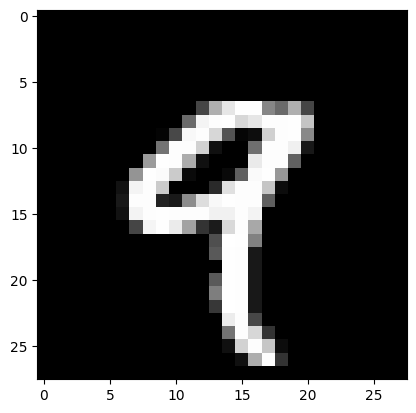

In [33]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
plt.imshow(train_images[4], cmap="Greys_r")
print(train_labels[1:10])

#Normalizing images
train_images = train_images / 255.0

test_images = test_images / 255.0


Flatten the train and test images

In [34]:
flattened_data = MNISTDataset(train_images.reshape([-1, 784]), train_labels,
                    test_images.reshape([-1, 784]), test_labels,
                    batch_size=128)
print(train_images.reshape([-1, 784]).shape)
train_images_flattened = train_images.reshape([-1, 784])
test_images_flattened = test_images.reshape([-1, 784])


(60000, 784)


In [35]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)


(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


**MLP Autoencoder**

Building a function to create an MLP autoencoder and a encoder + classifier.

In [36]:
def create_mlp_model(input_shape=(28, 28), output_activation="sigmoid", hidden_activation="relu", classifier_units=10, classifier_activation="softmax", freeze = False):
    layer_dims = [256, 128, 64, 32, 64, 128, 256, 784]

    # Define the encoder layers
    encoder_layers = []
    for i in range(4):  # Up to the layer before 32 neurons
        encoder_layers.append(tf.keras.layers.Dense(units=layer_dims[i], activation=hidden_activation))

    encoder = keras.Sequential([keras.layers.Flatten(input_shape=input_shape)] + encoder_layers)

    #when we are training the model we should not train the encoder but we just train the classifier.
    #but when we evaluate it goes through the whole network
    decoder_layers = []
    for i in range(4,8):  # Up to the layer before 32 neurons
        decoder_layers.append(tf.keras.layers.Dense(units=layer_dims[i], activation=hidden_activation))

    if freeze == True:
      for layer in encoder.layers:
        layer.trainable = False

    # Define the classifier layers
    classifier_layers = [
        tf.keras.layers.Dense(units=classifier_units, activation=classifier_activation)
    ]

    classifier = keras.Sequential(encoder_layers + classifier_layers)

    # Define the autoencoder model
    autoencoder = keras.Sequential([keras.layers.Flatten(input_shape=input_shape)] + encoder_layers +
                                   decoder_layers)


    return autoencoder, encoder, classifier


autoencoder, encoder, classifier = create_mlp_model()


Experimenting with different knid of activation functions

In [37]:
model_relu, model_relu_encoder, model_relu_classifier  = create_mlp_model(input_shape=(28, 28),output_activation="sigmoid",hidden_activation="relu")
model_sigmoid,model_sigmoid_encoder, model_sigmoid_classifier = create_mlp_model(input_shape=(28, 28),output_activation="sigmoid",hidden_activation="sigmoid")
model_tanh, model_tanh_encoder, model_tanh_classifier = create_mlp_model(input_shape=(28, 28),output_activation="sigmoid",hidden_activation="tanh")
model_linear, model_linear_encoder, model_linear_classifier = create_mlp_model(input_shape=(28, 28),output_activation="sigmoid",hidden_activation="linear")


Experimenting models with linear output

In [38]:
model_linear2, model_linear2_encoder, model_linear2_classifier = create_mlp_model(input_shape=(28, 28), output_activation="linear",hidden_activation="sigmoid")
model_linear3, model_linear3_encoder, model_linear3_classifier = create_mlp_model(input_shape=(28, 28), output_activation="linear",hidden_activation="relu")
model_relu2, model_relu2_encoder, model_relu2_classifier = create_mlp_model(input_shape=(28, 28), output_activation="sigmoid",hidden_activation="relu")


In [39]:
#Printing model summary to initial check
model_relu.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 784)               0         
                                                                 
 dense_72 (Dense)            (None, 256)               200960    
                                                                 
 dense_73 (Dense)            (None, 128)               32896     
                                                                 
 dense_74 (Dense)            (None, 64)                8256      
                                                                 
 dense_75 (Dense)            (None, 32)                2080      
                                                                 
 dense_76 (Dense)            (None, 64)                2112      
                                                                 
 dense_77 (Dense)            (None, 128)             

Compiling the models

In [40]:
def compile_mlp_model(model,loss="MAE", metrics=["accuracy"], optimizer = "adam"):
  if(loss == "MAE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=metrics)
  elif (loss == "MSQE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=metrics)
  else:
    model.compile(optimizer=optimizer, loss=tf.keras.losses.binary_crossentropy, metrics=metrics)


In [41]:
compile_mlp_model(model_linear, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_tanh, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_sigmoid, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_relu, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])


In [42]:
compile_mlp_model(model_linear2, loss = "MSQE", metrics=["accuracy"])
compile_mlp_model(model_linear2, loss = "MSQE", metrics=["accuracy"])
compile_mlp_model(model_linear3, loss = "MSQE", metrics=["accuracy"])
compile_mlp_model(model_sigmoid, loss = "MSQE", metrics=["accuracy", tf.keras.metrics.FalseNegatives(), tf.keras.metrics.FalsePositives()])
compile_mlp_model(model_relu2, metrics=["accuracy"])

model_linear2 = output_activation="linear", hidden_activation="sigmoid"

In [43]:
model_linear2.summary()

Model: "sequential_38"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_25 (Flatten)        (None, 784)               0         
                                                                 
 dense_108 (Dense)           (None, 256)               200960    
                                                                 
 dense_109 (Dense)           (None, 128)               32896     
                                                                 
 dense_110 (Dense)           (None, 64)                8256      
                                                                 
 dense_111 (Dense)           (None, 32)                2080      
                                                                 
 dense_112 (Dense)           (None, 64)                2112      
                                                                 
 dense_113 (Dense)           (None, 128)             

model_relu2 = output_activation="sigmoid",hidden_activation="relu"


In [44]:
model_relu2.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0799 - accuracy: 0.0099
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0626 - accuracy: 0.0119
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0588 - accuracy: 0.0117
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0566 - accuracy: 0.0116
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0549 - accuracy: 0.0125
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0535 - accuracy: 0.0127
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0520 - accuracy: 0.0126
Epoch 8/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0513 - accuracy: 0.0135
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0505 - accuracy: 0.0124
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - l

model_linear3 =output_activation="linear",hidden_activation="relu"

In [45]:
model_linear3.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 12s 5ms/step - loss: 0.0258 - accuracy: 0.0103
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0168 - accuracy: 0.0119
Epoch 3/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0149 - accuracy: 0.0132
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0138 - accuracy: 0.0128
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0133 - accuracy: 0.0133
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0129 - accuracy: 0.0129
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0125 - accuracy: 0.0139
Epoch 8/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0123 - accuracy: 0.0142
Epoch 9/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0121 - accuracy: 0.0144
Epoch 10/10
1875/1875 [==============================] - 10s 6ms/step - loss

model_linear =output_activation="sigmoid",hidden_activation="linear"


In [46]:
model_linear.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0211 - accuracy: 0.0113 - false_negatives: 3276159.0000 - false_positives: 91013.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0179 - accuracy: 0.0116 - false_negatives: 3077425.0000 - false_positives: 55700.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0179 - accuracy: 0.0115 - false_negatives: 3076821.0000 - false_positives: 55560.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0178 - accuracy: 0.0114 - false_negatives: 3072115.0000 - false_positives: 55037.0000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0178 - accuracy: 0.0112 - false_negatives: 3072070.0000 - false_positives: 54438.0000
Epoch 6/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0177 - accuracy: 0.0110 - false_negatives: 3070031.0000 - false_positives: 54461.0000
Epoch 7/10

model_linear2 = output_activation="linear",hidden_activation="sigmoid"

In [47]:
model_linear2.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0651 - accuracy: 0.0103
Epoch 2/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0548 - accuracy: 0.0165
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0511 - accuracy: 0.0160
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0485 - accuracy: 0.0163
Epoch 5/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0462 - accuracy: 0.0154
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0432 - accuracy: 0.0139
Epoch 7/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0418 - accuracy: 0.0130
Epoch 8/10
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0406 - accuracy: 0.0136
Epoch 9/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0395 - accuracy: 0.0131
Epoch 10/10
1875/1875 [==============================] - 11s 6ms/step - los

model_relu = output_activation="sigmoid",hidden_activation="relu"


In [48]:
model_relu.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0267 - accuracy: 0.0099 - false_negatives_3: 3676400.0000 - false_positives_3: 211180.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0174 - accuracy: 0.0120 - false_negatives_3: 3135341.0000 - false_positives_3: 99529.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0154 - accuracy: 0.0121 - false_negatives_3: 3056816.0000 - false_positives_3: 76268.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0142 - accuracy: 0.0129 - false_negatives_3: 3014529.0000 - false_positives_3: 62677.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0135 - accuracy: 0.0133 - false_negatives_3: 2990817.0000 - false_positives_3: 55216.0000
Epoch 6/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0129 - accuracy: 0.0131 - false_negatives_3: 2972044.0000 - false_positives

model_sigmoid = output_activation="sigmoid",hidden_activation="sigmoid"


In [49]:
model_sigmoid.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 14s 6ms/step - loss: 0.0654 - accuracy: 0.0104 - false_negatives_4: 7662156.0000 - false_positives_4: 519225.0000
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0549 - accuracy: 0.0154 - false_negatives_4: 5867688.0000 - false_positives_4: 770692.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0483 - accuracy: 0.0127 - false_negatives_4: 4918503.0000 - false_positives_4: 815925.0000
Epoch 4/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0431 - accuracy: 0.0148 - false_negatives_4: 4419510.0000 - false_positives_4: 745039.0000
Epoch 5/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0409 - accuracy: 0.0154 - false_negatives_4: 4255122.0000 - false_positives_4: 695222.0000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0397 - accuracy: 0.0147 - false_negatives_4: 4181614.0000 - false_posit

model_tanh = output_activation="sigmoid",hidden_activation="tanh"


In [50]:
model_tanh.fit(train_images, train_images_flattened,  epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 6ms/step - loss: 0.0249 - accuracy: 0.0132 - false_negatives_1: 3226222.0000 - false_positives_1: 168248.0000
Epoch 2/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0204 - accuracy: 0.0133 - false_negatives_1: 2975098.0000 - false_positives_1: 107440.0000
Epoch 3/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0198 - accuracy: 0.0134 - false_negatives_1: 2996785.0000 - false_positives_1: 102970.0000
Epoch 4/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0191 - accuracy: 0.0136 - false_negatives_1: 2983267.0000 - false_positives_1: 97657.0000
Epoch 5/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0183 - accuracy: 0.0143 - false_negatives_1: 2955835.0000 - false_positives_1: 92043.0000
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0174 - accuracy: 0.0141 - false_negatives_1: 2914155.0000 - false_positiv

**Evaluation**


In [51]:
def evaluate_and_output_model(model, test_labels, test_images, reshape_matrix = [-1, 784], image_matrix=[10000,28,28], images_to_be_compared=6): #there are 10,000 images and hence image matrix is 10,000

  #mnist dataset has 10 classes
  class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

  print(test_images.shape)

  test_output_model = model.predict(test_images)

  model_output_images = test_output_model.reshape(image_matrix)

  print(model_output_images.shape)

  plt.figure(figsize=(10,10))
  j = -1

  #plt.figure(figsize=(10,10)): Creating a new figure for the plot with a specified size of 10x10 inches.
  #Looping through a range (25 times) to create subplots:
    #If the current index is even, an original test image is plotted.
    #If the current index is odd, the corresponding model-generated image is plotted.

  for i in range(30):
      plt.subplot(5,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j+1
      if(i%2 == 0):
        plt.imshow(test_images[i+10], cmap=plt.cm.binary)
      elif(j%2 == 1):

        plt.imshow(model_output_images[j-1+10], cmap="Greys_r")

      #plt.xlabel(class_names[test_images[i]])
  plt.show()


(10000, 28, 28)
313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


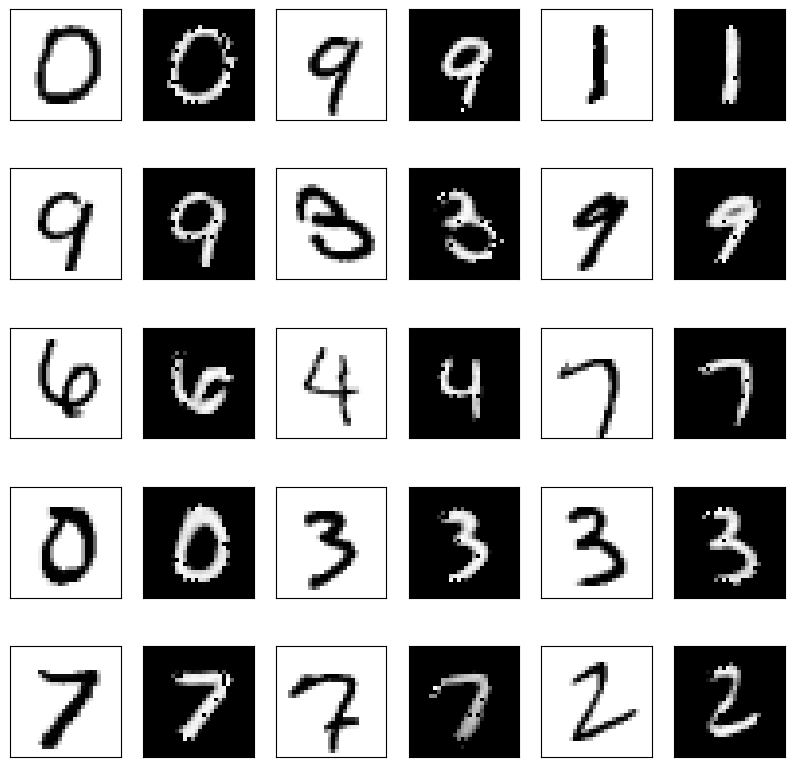

In [52]:
evaluate_and_output_model(model_relu2, test_labels, test_images)

(10000, 28, 28)
313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


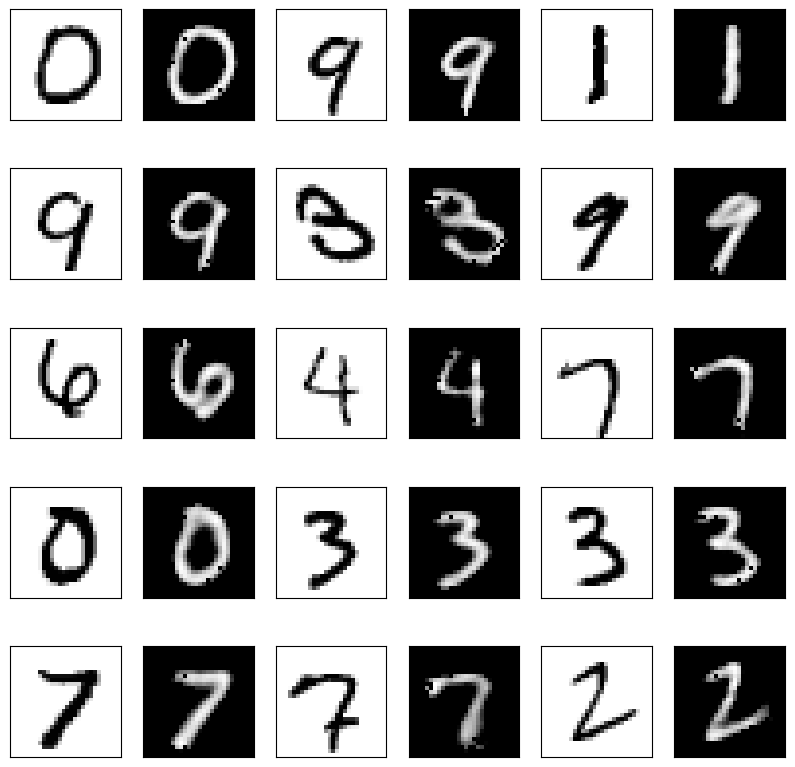

In [53]:
evaluate_and_output_model(model_linear3, test_labels, test_images)

(10000, 28, 28)
313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


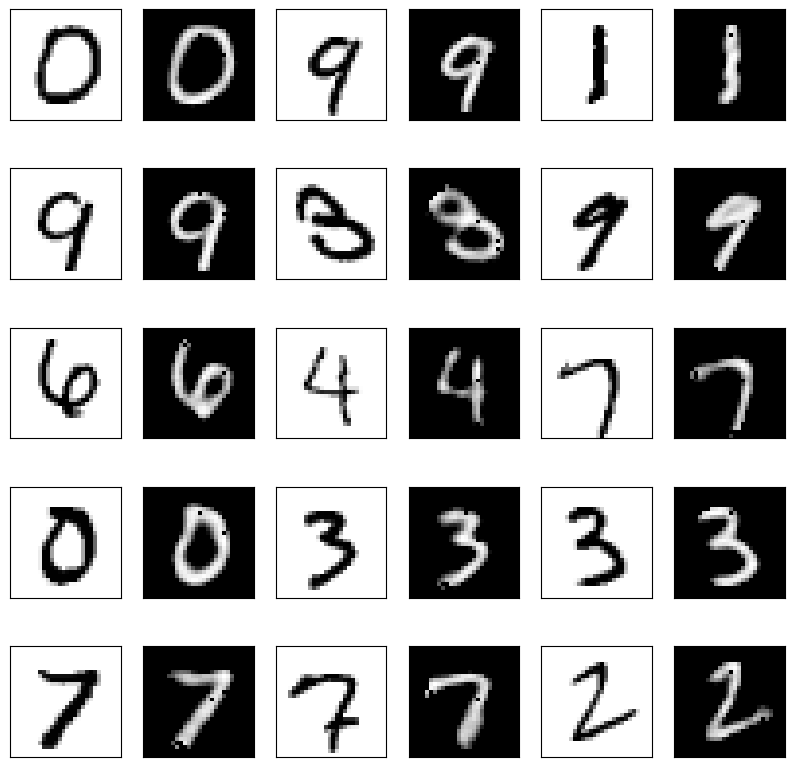

In [54]:
evaluate_and_output_model(model_relu, test_labels, test_images)

(10000, 28, 28)
313/313 [==============================] - 1s 2ms/step
(10000, 28, 28)


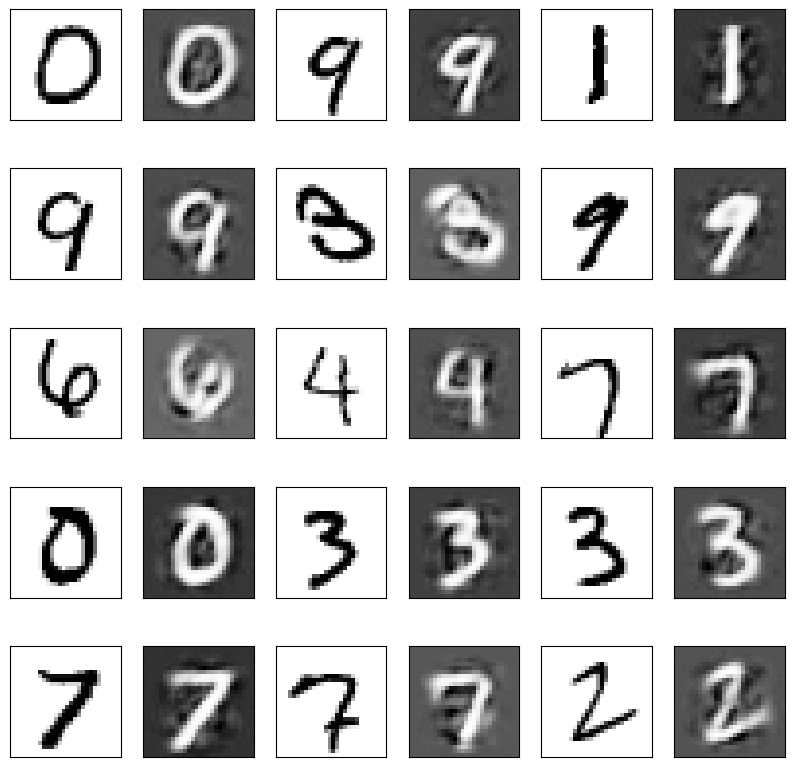

In [55]:
evaluate_and_output_model(model_tanh, test_labels, test_images)

**Training the classifier of the relu autoencoder
**

In [56]:
model_relu2_classifier.compile(optimizer='adam',
              loss=tf.keras.losses.MAE, #tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'], run_eagerly=True)

Epoch 1/10


1875/1875 [==============================] - 65s 34ms/step - loss: 4.3737 - accuracy: 0.1003
Epoch 2/10
1875/1875 [==============================] - 63s 33ms/step - loss: 4.3737 - accuracy: 0.0970
Epoch 3/10
1875/1875 [==============================] - 63s 33ms/step - loss: 4.3737 - accuracy: 0.0903
Epoch 4/10
1875/1875 [==============================] - 64s 34ms/step - loss: 4.3737 - accuracy: 0.0821
Epoch 5/10
1875/1875 [==============================] - 62s 33ms/step - loss: 4.3737 - accuracy: 0.0738
Epoch 6/10
1875/1875 [==============================] - 62s 33ms/step - loss: 4.3737 - accuracy: 0.0662
Epoch 7/10
1875/1875 [==============================] - 62s 33ms/step - loss: 4.3737 - accuracy: 0.0629
Epoch 8/10
1875/1875 [==============================] - 63s 33ms/step - loss: 4.3737 - accuracy: 0.0612
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 4.3737 - accuracy: 0.0584
Epoch 10/10
1875/1875 [==============================] - 62s 33ms/step - lo

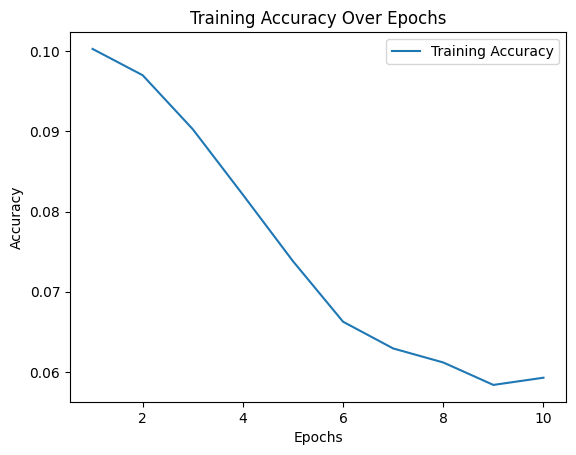

313/313 [==============================] - 5s 15ms/step - loss: 4.3630 - accuracy: 0.0531
Test Loss: 4.3629984855651855
Test Accuracy: 0.05310000106692314


In [57]:
# Train the model and get the training history
history = model_relu2_classifier.fit(train_images_flattened, train_labels, epochs=10)

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']

# Plotting the training accuracy curve
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_relu2_classifier.evaluate(test_images_flattened, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

building a normal mlp model

In [58]:
model2 = keras.Sequential([
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")

])


In [59]:
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'], run_eagerly=True)


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5727: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1875/1875 [==============================] - 62s 33ms/step - loss: 0.2403 - accuracy: 0.9268
Epoch 2/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0986 - accuracy: 0.9702
Epoch 3/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0715 - accuracy: 0.9777
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0548 - accuracy: 0.9826
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0446 - accuracy: 0.9862
Epoch 6/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0362 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.0328 - accuracy: 0.9896
Epoch 8/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.0271 - accuracy: 0.9913
Epoch 9/10
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0247 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 61s 33ms/step - lo

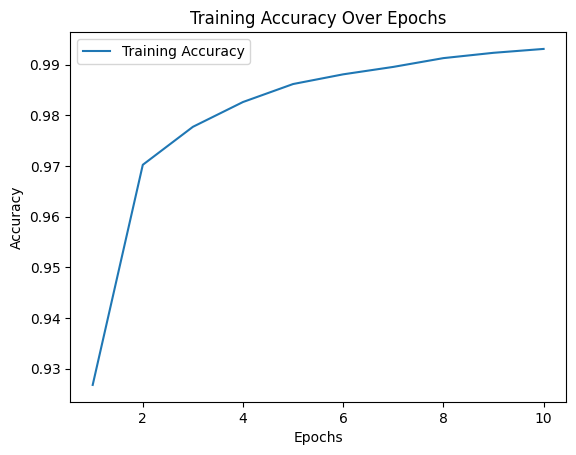

313/313 [==============================] - 5s 15ms/step - loss: 0.0932 - accuracy: 0.9792
Test Loss: 0.0931796133518219
Test Accuracy: 0.979200005531311


In [60]:
# Train the model and get the training history
history = model2.fit(train_images_flattened, train_labels, epochs=10)

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']

# Plotting the training accuracy curve
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model2.evaluate(test_images_flattened, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


In [61]:
test_output_model2 = model2.predict(test_images.reshape([-1, 784]),)
test_output_model = model_relu2_classifier.predict(test_images.reshape([-1, 784]),)


313/313 [==============================] - 2s 6ms/step


In [62]:
test_loss, test_acc = model2.evaluate(test_images_flattened,  test_labels, verbose=2)

print('\n  Relu Test accuracy:', str(test_acc) + " test loss: " + str(test_loss) + "\n")

test_loss, test_acc = model_relu2_classifier.evaluate(test_images_flattened,  test_labels, verbose=2)

print('\n Sigmoid Test accuracy:', str(test_acc) + " test loss: " + str(test_loss))

313/313 - 5s - loss: 0.0932 - accuracy: 0.9792 - 5s/epoch - 16ms/step

  Relu Test accuracy: 0.979200005531311 test loss: 0.0931796133518219

313/313 - 4s - loss: 4.3630 - accuracy: 0.0531 - 4s/epoch - 12ms/step

 Sigmoid Test accuracy: 0.05310000106692314 test loss: 4.3629984855651855


**Convolution Autoencoder**

In [63]:
mnist = tf.keras.datasets.mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

train_data = tf.data.Dataset.from_tensor_slices(( train_images_raw.astype(np.float32)/255.0, train_images_raw.astype(np.float32)/255.0 ))

train_data = train_data.shuffle(buffer_size = train_images_raw.shape[0]).batch(32)

#test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0, test_labels_raw.astype(np.int32) ))
test_data = tf.data.Dataset.from_tensor_slices(( test_images_raw.astype(np.float32)/255.0,  test_images_raw.astype(np.float32)/255.0 ))
test_data = test_data.batch(32)

In [64]:
input_shape = (train_images_raw.shape[1], train_images_raw.shape[2], 1)
print(input_shape)
print(train_images_raw.shape)

(28, 28, 1)
(60000, 28, 28)


In [65]:
def create_conv_autoencoder_model(encoder_layer_dims=[32,64,128], compression_layer_dim=64, decoder_layer_dims=[32, 16, 1], input_shape=(28,28,1), ks=3,
                  batch_norm_flag=True, dense_latent_rep_flag=False, upsampling_flag = False):
  model = models.Sequential()

  #Build encoder part, add batch norm after encoder if batch norm flag is set to true
  conv_enc_base_name = "conv_enc_"
  conv_cmprsn_base_name = "conv_compress_dims"
  conv_dec_base_name = "conv_dec_"
  for i in range (len(encoder_layer_dims)):
    #For first layer we need to specify shape
    if(i == 0):
      model.add(layers.Conv2D(filters = encoder_layer_dims[i], kernel_size=(ks, ks),  padding = "same",
                              activation=tf.nn.relu, name = conv_enc_base_name + str(i), input_shape = input_shape))
      if(batch_norm_flag):
        model.add(layers.BatchNormalization())

      model.add(layers.MaxPool2D(pool_size=(2,2)))
    else:
      model.add(layers.Conv2D(filters = encoder_layer_dims[i], kernel_size=(ks, ks),  padding = "same",
                              activation=tf.nn.relu, name = conv_enc_base_name + str(i)))

      if(batch_norm_flag):
        model.add(layers.BatchNormalization())

      model.add(layers.MaxPool2D(pool_size=(2,2)))

  print("Encoder has been built, checking for compression flag")

  #latent space rep
  model.add(layers.Conv2D(filters = compression_layer_dim, kernel_size=(1, 1),  padding = "same", activation = tf.nn.relu, name = conv_cmprsn_base_name))

  #Build Decoder , add batch norm before adding conv transpose, Use sigmoid at final layer and relu for others
  if(upsampling_flag == False):
    for i in range (len(decoder_layer_dims)):
      if(i == 0):
        if(batch_norm_flag):
          model.add(layers.BatchNormalization())

        model.add(layers.Conv2DTranspose(filters = decoder_layer_dims[i], kernel_size=(ks, ks),  strides=(2,2), padding = "valid",
                                  activation=tf.nn.relu, name = conv_dec_base_name + str(i)))

      elif(i < len(decoder_layer_dims)-1 and i > 0):

        if(batch_norm_flag):
          model.add(layers.BatchNormalization())

        model.add(layers.Conv2DTranspose(filters = decoder_layer_dims[i], kernel_size=(ks, ks),  strides=(2,2), padding = "same",
                                  activation=tf.nn.relu, name = conv_dec_base_name + str(i)))
      else:
        if(batch_norm_flag):
          model.add(layers.BatchNormalization())

        model.add(layers.Conv2DTranspose(filters = decoder_layer_dims[i], kernel_size=(ks, ks), strides=(2,2), padding = "same",
                                  activation=tf.nn.sigmoid, name = conv_dec_base_name + str(i)))

  elif(upsampling_flag == True):
      print("Upscaling with convolution choosen")
      for i in range (len(decoder_layer_dims)):
        if(i == 0):
          model.add(layers.UpSampling2D(size=(3, 3)))
          if(batch_norm_flag):
            model.add(layers.BatchNormalization())

          model.add(layers.Conv2D(filters = decoder_layer_dims[i], kernel_size=(ks, ks), padding = "valid", activation=tf.nn.relu, name = conv_dec_base_name + str(i)))
          model.add(layers.UpSampling2D())

        elif(i < len(decoder_layer_dims)-1 and i > 0):

          if(batch_norm_flag):
            model.add(layers.BatchNormalization())

          model.add(layers.Conv2D(filters = decoder_layer_dims[i], kernel_size=(ks, ks), padding = "same", activation=tf.nn.relu, name = conv_dec_base_name + str(i)))
          model.add(layers.UpSampling2D())
        else:
          if(batch_norm_flag):
            model.add(layers.BatchNormalization())

          model.add(layers.Conv2D(filters = decoder_layer_dims[i], kernel_size=(ks, ks),  padding = "same", activation=tf.nn.sigmoid, name = conv_dec_base_name + str(i)))

  print("Model has been built, printing summary")

  print(model.summary())
  return model;



In [66]:
conv_model_with_upsampling = create_conv_autoencoder_model(upsampling_flag=True)
conv_model_with_upsampling.summary()

Encoder has been built, checking for compression flag
Upscaling with convolution choosen
Model has been built, printing summary
Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_enc_0 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 28, 28, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv_enc_1 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Bat  (None, 14, 14, 64)        25

In [67]:
conv_model_with_fc = create_conv_autoencoder_model(dense_latent_rep_flag=True)
conv_model_with_fc.summary()

Encoder has been built, checking for compression flag
Model has been built, printing summary
Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_enc_0 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_6 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_enc_1 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_7 (Bat  (None, 14, 14, 64)        256       
 chNormalization)         

In [68]:
conv_model_with_batchnorm = create_conv_autoencoder_model()
conv_model_with_batchnorm.summary()

Encoder has been built, checking for compression flag
Model has been built, printing summary
Model: "sequential_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_enc_0 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_12 (Ba  (None, 28, 28, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_enc_1 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_13 (Ba  (None, 14, 14, 64)        256       
 tchNormalization)        

In [69]:
conv_model_without_batchnorm = create_conv_autoencoder_model(batch_norm_flag=False)

Encoder has been built, checking for compression flag
Model has been built, printing summary
Model: "sequential_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_enc_0 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv_enc_1 (Conv2D)         (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv_enc_2 (Conv2D)         (None, 7, 7, 128)         73856     
                          

In [70]:
conv_model_with_batchnorm.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics=["accuracy"])
conv_model_without_batchnorm.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics=["accuracy"])

In [71]:
conv_model_with_fc.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics=["accuracy"])


In [72]:
conv_model_with_upsampling.compile(optimizer="adam", loss=tf.keras.losses.MeanAbsoluteError(), metrics=["accuracy"])

In [73]:
x = tf.expand_dims(train_images_raw.astype(np.float32)/255.0 , -1)
y = tf.expand_dims(train_images_raw.astype(np.float32)/255.0, -1)
print(x.shape)
print(x.dtype)

(60000, 28, 28, 1)
<dtype: 'float32'>


In [74]:
conv_model_with_batchnorm.fit(x=x, y=y, epochs = 7)
conv_model_without_batchnorm.fit(x=x, y=y, epochs = 7)

Epoch 1/7
1875/1875 [==============================] - 22s 8ms/step - loss: 0.0505 - accuracy: 0.8048
Epoch 2/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0179 - accuracy: 0.8153
Epoch 3/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0158 - accuracy: 0.8154
Epoch 4/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0146 - accuracy: 0.8154
Epoch 5/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0139 - accuracy: 0.8154
Epoch 6/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0133 - accuracy: 0.8154
Epoch 7/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0129 - accuracy: 0.8154
Epoch 1/7
1875/1875 [==============================] - 13s 6ms/step - loss: 0.1338 - accuracy: 0.8070
Epoch 2/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1307 - accuracy: 0.8088
Epoch 3/7
1875/1875 [==============================] - 12s 6ms/step - loss: 0.1307

In [75]:
conv_model_with_upsampling.fit(x=x, y=y, epochs=7)

Epoch 1/7
1875/1875 [==============================] - 19s 8ms/step - loss: 0.0486 - accuracy: 0.8048
Epoch 2/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0244 - accuracy: 0.8147
Epoch 3/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0214 - accuracy: 0.8150
Epoch 4/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0199 - accuracy: 0.8151
Epoch 5/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0188 - accuracy: 0.8152
Epoch 6/7
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0181 - accuracy: 0.8153
Epoch 7/7
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0175 - accuracy: 0.8153


In [76]:
def evaluate_and_output_model(model, test_images, images_to_be_compared=5):
  class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']
  print(test_images.shape)
  #test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
  print(test_images.shape)
  #print('\n  Relu Test accuracy:', str(test_acc) + " test loss: " + str(test_loss) + "\n")
  model_output_images = model.predict(test_images)
  print(model_output_images.shape)
  plt.figure(figsize=(10,10))
  j = -1
  for i in range(25):
      plt.subplot(5,5,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j+1
      if(i%2 == 0):
        plt.imshow(test_images[i+10][:,:,0], cmap=plt.cm.binary)
      elif(j%2 == 1):

        plt.imshow(model_output_images[j-1+10][:,:,0], cmap=plt.cm.binary)

      #plt.xlabel(class_names[test_images[i]])
  plt.show()

(10000, 28, 28, 1)
(10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step
(10000, 28, 28, 1)


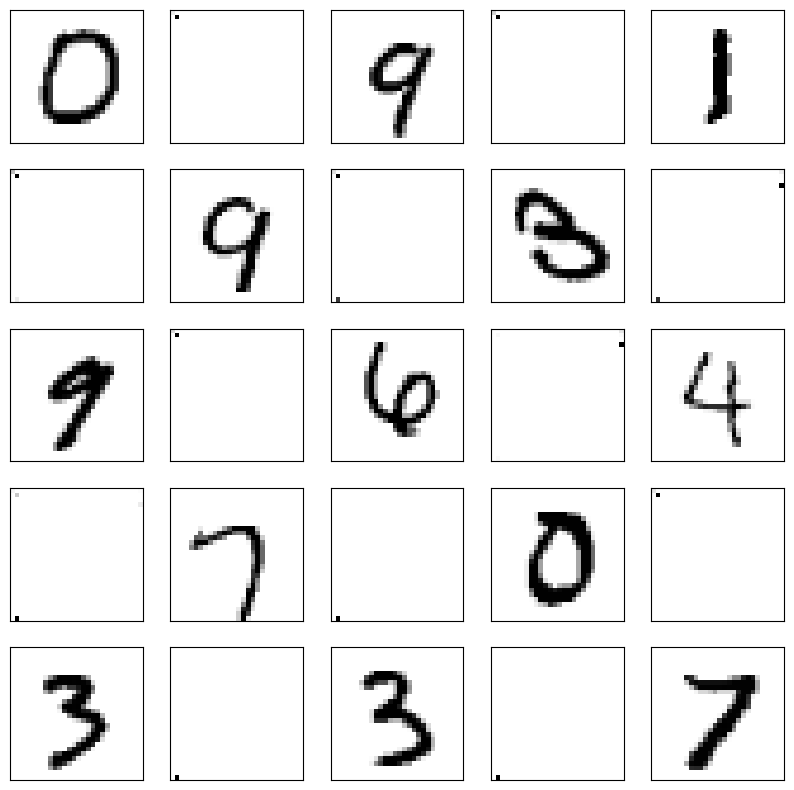

In [77]:
evaluate_and_output_model(conv_model_without_batchnorm, tf.expand_dims(test_images_raw.astype(np.float32)/255.0, -1))

(10000, 28, 28, 1)
(10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step
(10000, 28, 28, 1)


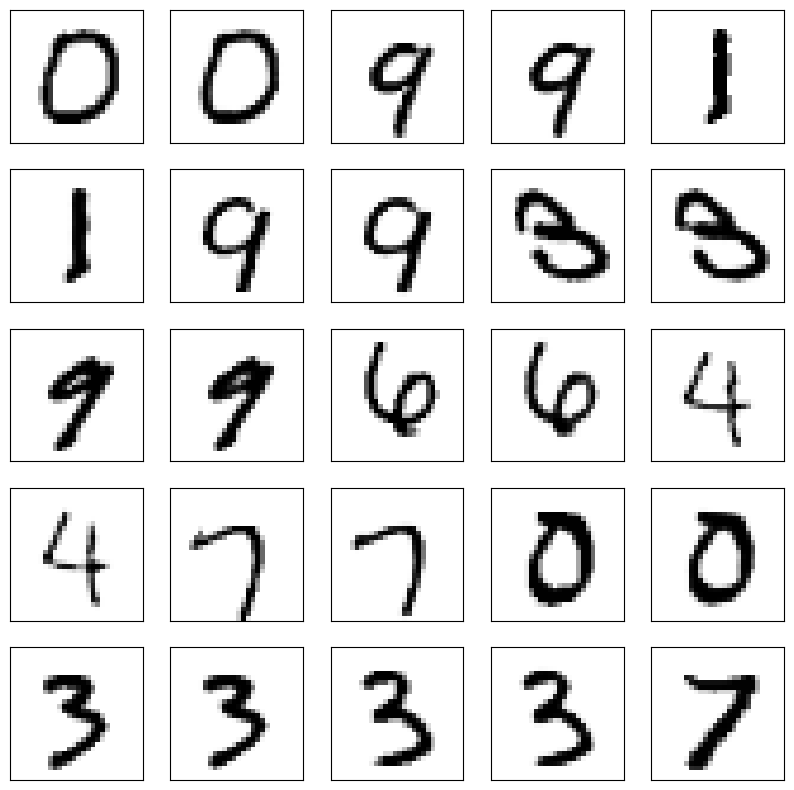

In [78]:
evaluate_and_output_model(conv_model_with_batchnorm, tf.expand_dims(test_images_raw.astype(np.float32)/255.0, -1))

(10000, 28, 28, 1)
(10000, 28, 28, 1)
313/313 [==============================] - 1s 3ms/step
(10000, 28, 28, 1)


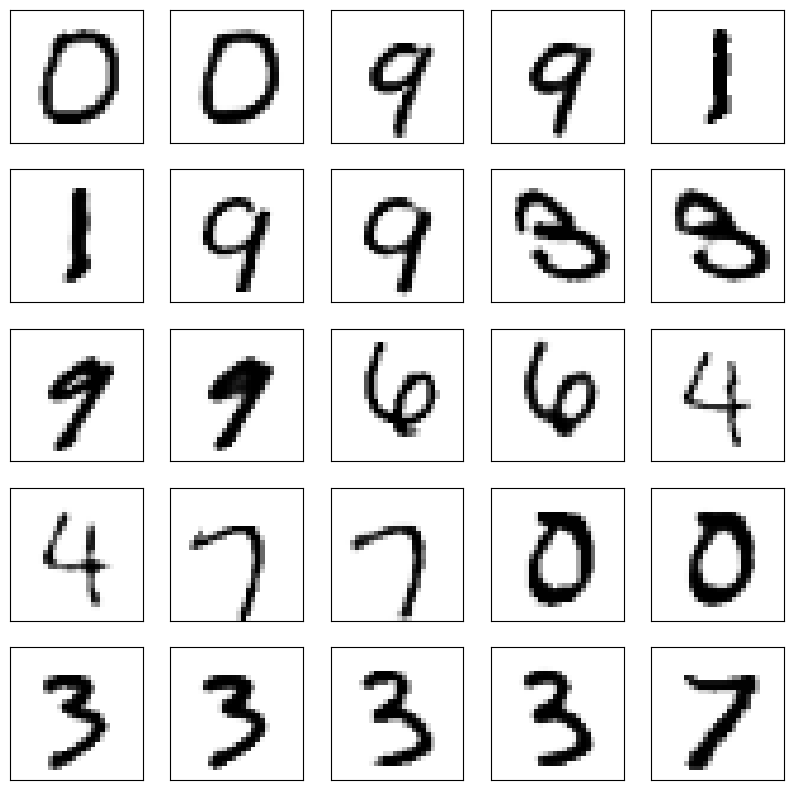

In [79]:
evaluate_and_output_model(conv_model_with_upsampling, tf.expand_dims(test_images_raw.astype(np.float32)/255.0, -1))


**Pre-training for low supervision scenarios**

In [80]:
# Load MNIST data
mnist = tf.keras.datasets.mnist
(train_images_raw, train_labels_raw), (test_images_raw, test_labels_raw) = mnist.load_data()

# Shuffle the training data
train_data = tf.data.Dataset.from_tensor_slices((train_images_raw.astype(np.float32) / 255.0, train_labels_raw.astype(np.int32)))
train_data_shuffled = train_data.shuffle(buffer_size=train_images_raw.shape[0])

# Take a random subset of size 100
random_subset = train_data_shuffled.take(100)

# Extract images and labels from the subset
random_images, random_labels = zip(*list(random_subset))

"""

# Extract images and labels from the subset without using zip
random_images = []
random_labels = []

for images, labels in random_subset:
    random_images.append(images)
    random_labels.append(labels)

"""
# Convert to NumPy arrays
random_images = np.array(random_images)
random_labels = np.array(random_labels)

print(random_labels)

[1 0 0 5 5 6 7 5 3 2 8 5 0 9 4 4 6 0 3 5 0 8 9 4 7 6 1 3 3 4 4 6 8 8 2 6 3
 2 9 1 3 7 2 1 2 7 9 4 3 9 2 6 7 3 2 9 8 7 8 3 7 4 6 8 3 4 9 7 9 9 7 7 8 1
 9 6 5 5 8 9 5 2 7 7 0 7 0 1 5 0 8 3 7 6 4 3 3 9 4 3]


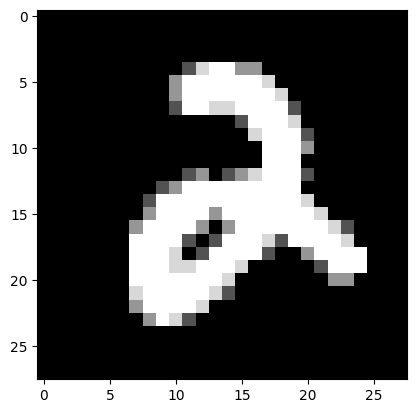

In [81]:
plt.imshow(random_images[9], cmap="Greys_r")

random_images_reshaped = random_images.reshape([-1, 784])


In [82]:
model_relu.fit(random_images, random_images_reshaped,  epochs=1000)

Epoch 1/1000
4/4 [==============================] - 1s 15ms/step - loss: 0.0121 - accuracy: 0.0100 - false_negatives_3: 4902.0000 - false_positives_3: 60.0000
Epoch 2/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.0300 - false_negatives_3: 4940.0000 - false_positives_3: 43.0000
Epoch 3/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0113 - accuracy: 0.0200 - false_negatives_3: 4865.0000 - false_positives_3: 55.0000
Epoch 4/1000
4/4 [==============================] - 0s 10ms/step - loss: 0.0111 - accuracy: 0.0300 - false_negatives_3: 4816.0000 - false_positives_3: 43.0000
Epoch 5/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0108 - accuracy: 0.0100 - false_negatives_3: 5054.0000 - false_positives_3: 27.0000
Epoch 6/1000
4/4 [==============================] - 0s 9ms/step - loss: 0.0115 - accuracy: 0.0200 - false_negatives_3: 4863.0000 - false_positives_3: 51.0000
Epoch 7/1000
4/4 [==============================] 

In [83]:
def evaluate_and_output_model(model, test_labels, test_images, reshape_matrix = [-1, 784], image_matrix=[10000,28,28], images_to_be_compared=6): #there are 10,000 images and hence image matrix is 10,000

  #mnist dataset has 10 classes
  class_names = ['0', '1', '2', '3', '4','5', '6', '7', '8', '9']

  print(test_images.shape)

  test_output_model = model.predict(test_images)

  model_output_images = test_output_model.reshape(image_matrix)

  print(model_output_images.shape)

  plt.figure(figsize=(10,10))
  j = -1

  #plt.figure(figsize=(10,10)): Creating a new figure for the plot with a specified size of 10x10 inches.
  #Looping through a range (25 times) to create subplots:
    #If the current index is even, an original test image is plotted.
    #If the current index is odd, the corresponding model-generated image is plotted.

  for i in range(30):
      plt.subplot(5,6,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)
      j = j+1
      if(i%2 == 0):
        plt.imshow(test_images[i+10], cmap=plt.cm.binary)
      elif(j%2 == 1):

        plt.imshow(model_output_images[j-1+10], cmap="Greys_r")

      #plt.xlabel(class_names[test_images[i]])
  plt.show()


(10000, 28, 28)
313/313 [==============================] - 1s 3ms/step
(10000, 28, 28)


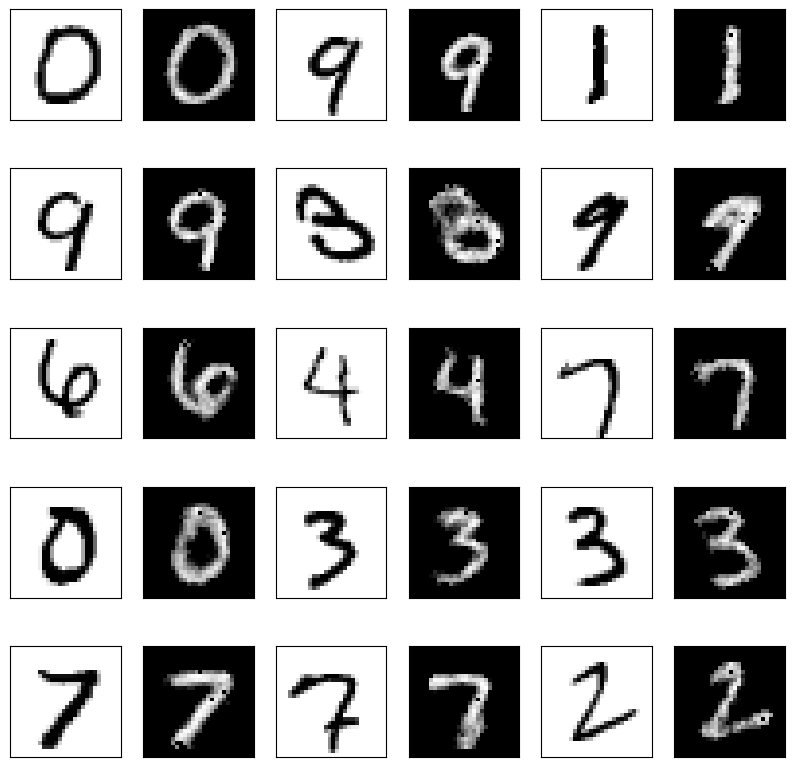

In [84]:
evaluate_and_output_model(model_relu, test_labels, test_images)

In [85]:
model_relu_classifier.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'], run_eagerly=True)


Epoch 1/10
4/4 [==============================] - 2s 72ms/step - loss: 2.6837 - accuracy: 0.1200
Epoch 2/10
4/4 [==============================] - 0s 40ms/step - loss: 2.0689 - accuracy: 0.3100
Epoch 3/10
4/4 [==============================] - 0s 56ms/step - loss: 1.7784 - accuracy: 0.4400
Epoch 4/10
4/4 [==============================] - 0s 50ms/step - loss: 1.5790 - accuracy: 0.6000
Epoch 5/10
4/4 [==============================] - 0s 50ms/step - loss: 1.3678 - accuracy: 0.6700
Epoch 6/10
4/4 [==============================] - 0s 53ms/step - loss: 1.1684 - accuracy: 0.6900
Epoch 7/10
4/4 [==============================] - 0s 51ms/step - loss: 0.9972 - accuracy: 0.7400
Epoch 8/10
4/4 [==============================] - 0s 48ms/step - loss: 0.8078 - accuracy: 0.8300
Epoch 9/10
4/4 [==============================] - 0s 52ms/step - loss: 0.6456 - accuracy: 0.9200
Epoch 10/10
4/4 [==============================] - 0s 51ms/step - loss: 0.5258 - accuracy: 0.9400


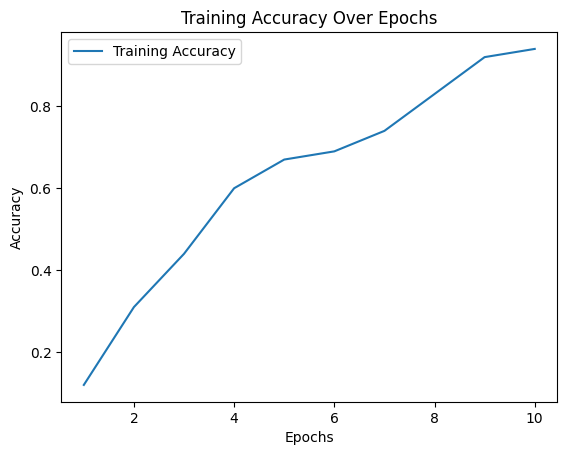

313/313 [==============================] - 5s 16ms/step - loss: 1.2028 - accuracy: 0.6173
Test Loss: 1.2027541399002075
Test Accuracy: 0.6172999739646912


In [86]:
# Train the model and get the training history
history = model_relu_classifier.fit(random_images_reshaped, random_labels, epochs=10)

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']

# Plotting the training accuracy curve
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_relu_classifier.evaluate(test_images_flattened, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [87]:
model2 = keras.Sequential([
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(64, activation="relu"),
    keras.layers.Dense(32, activation="relu"),
    keras.layers.Dense(10, activation="sigmoid")

])


In [88]:
model2.compile(optimizer='adam',
               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
               metrics=['accuracy'], run_eagerly=True)


Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.2383 - accuracy: 0.9273
Epoch 2/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0993 - accuracy: 0.9699
Epoch 3/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0699 - accuracy: 0.9786
Epoch 4/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0567 - accuracy: 0.9820
Epoch 5/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0437 - accuracy: 0.9860
Epoch 6/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.0378 - accuracy: 0.9881
Epoch 7/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0330 - accuracy: 0.9895
Epoch 8/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0289 - accuracy: 0.9911
Epoch 9/10
1875/1875 [==============================] - 58s 31ms/step - loss: 0.0260 - accuracy: 0.9921
Epoch 10/10
1875/1875 [==============================] - 58s 31m

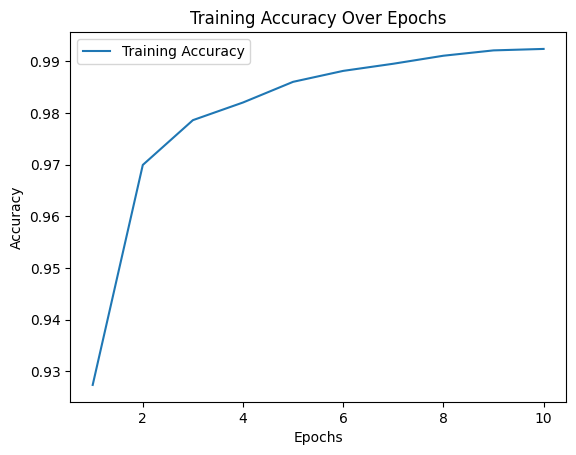

313/313 [==============================] - 5s 16ms/step - loss: 0.0724 - accuracy: 0.9814
Test Loss: 0.07240445911884308
Test Accuracy: 0.9814000129699707


In [89]:
# Train the model and get the training history
history = model2.fit(train_images_flattened, train_labels, epochs=10)

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']

# Plotting the training accuracy curve
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model2.evaluate(test_images_flattened, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')


**FREEZE THE ENCODER**

In [90]:
model_relu, model_relu_encoder, model_relu_classifier  = create_mlp_model(input_shape=(28, 28),output_activation="sigmoid",hidden_activation="relu")


In [91]:
#Printing model summary to initial check
model_relu.summary()


Model: "sequential_53"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_31 (Flatten)        (None, 784)               0         
                                                                 
 dense_145 (Dense)           (None, 256)               200960    
                                                                 
 dense_146 (Dense)           (None, 128)               32896     
                                                                 
 dense_147 (Dense)           (None, 64)                8256      
                                                                 
 dense_148 (Dense)           (None, 32)                2080      
                                                                 
 dense_149 (Dense)           (None, 64)                2112      
                                                                 
 dense_150 (Dense)           (None, 128)             

In [92]:
def compile_mlp_model(model,loss="MAE", metrics=["accuracy"], optimizer = "adam"):
  if(loss == "MAE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.MAE, metrics=metrics)
  elif (loss == "MSQE"):
    model.compile(optimizer=optimizer, loss=tf.keras.losses.mean_squared_error, metrics=metrics)
  else:
    model.compile(optimizer=optimizer, loss=tf.keras.losses.binary_crossentropy, metrics=metrics)




In [93]:
compile_mlp_model(model_relu_classifier, loss = "MSQE", metrics=["accuracy"])


Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 27.3046 - accuracy: 0.1054
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 27.3046 - accuracy: 0.1118
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3046 - accuracy: 0.1042
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 27.3046 - accuracy: 0.1046
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3045 - accuracy: 0.1055
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 27.3045 - accuracy: 0.1040
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3046 - accuracy: 0.1019
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 27.3046 - accuracy: 0.1026
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 27.3046 - accuracy: 0.1043
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - lo

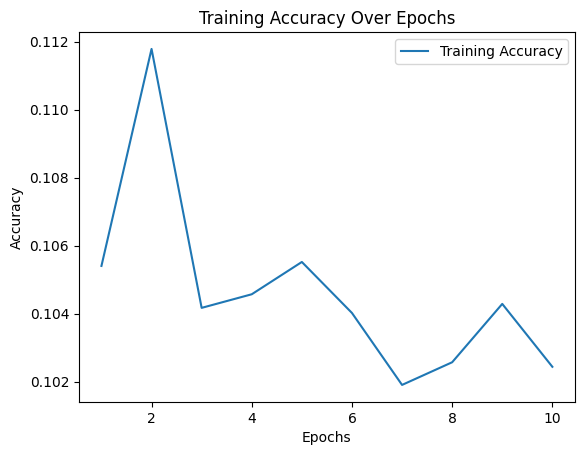

313/313 [==============================] - 1s 3ms/step - loss: 27.2503 - accuracy: 0.1017
Test Loss: 27.250308990478516
Test Accuracy: 0.10170000046491623


In [94]:
# Train the model and get the training history
history = model_relu_classifier.fit(train_images_flattened, train_labels, epochs=10)

# Access the accuracy values from the history object
train_accuracy = history.history['accuracy']

# Plotting the training accuracy curve
plt.plot(range(1, 11), train_accuracy, label='Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.legend()
plt.show()

# Evaluate the model on the test dataset
test_loss, test_accuracy = model_relu_classifier.evaluate(test_images_flattened, test_labels)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

In [95]:
#first we train the autoencoder. now we want to train the encoder and classifier but but only the classifier should be trained and not the encoder again.